In [45]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df = erk.industry_dframe()
annual_ret = erk.periodic_returns(df["1996":"2000"], 12)
cov = df["1996":"2000"].cov()

In [7]:
l = ["Food","Beer","Smoke","Coal"]
covmat = cov.loc[l,l]

In [8]:
covmat

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [10]:
weights = np.repeat(1/4, 4)
print(erk.portfolio_return(weights, annual_ret[l]))
print(erk.portfolio_volatility(weights, covmat))

0.19511097196038385
0.055059195776437045


# 2 Asset Frontier

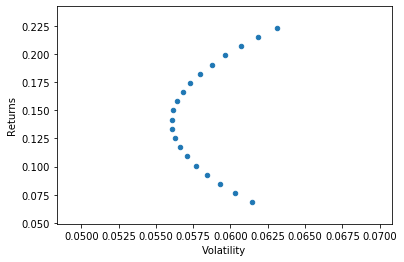

In [17]:
l = ["Games","Fin"]
df = erk.industry_dframe()
asset_ret = erk.periodic_returns(df["1996":"2000"], 12)
cov = df["1996":"2000"].cov()
n_points = 20
weights = [np.array([w,1-w]) for w in np.linspace(0, 1, n_points)]
rets = [erk.portfolio_return(w, asset_ret[l]) for w in weights]
vols = [erk.portfolio_volatility(w, cov.loc[l,l]) for w in weights]
data = pd.DataFrame({
    "Returns": rets,
    "Volatility": vols
})
data.plot.scatter(x=data.columns[1], y=data.columns[0])
plt.show()

### Plotting 2 Asset Frontier using Sel build library

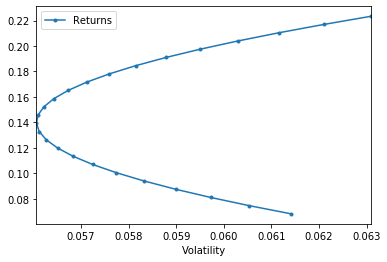

In [46]:
l = ["Games","Fin"]
df = erk.industry_dframe()
asset_ret = erk.periodic_returns(df["1996":"2000"], 12)[l]
cov = df["1996":"2000"].cov()
erk.plot_2Asset_Frontier(25, asset_ret, cov, l)